## Aula 6 - Gradientes de Imagem

Os filtros de passa-alta têm como objetivo realçar varias bruscas de pixels, que são as regiões de borda.

Iremos ver os seguintes filtros:

- Sobel
- Scharr
- Laplaciano
- e também o Canny Edge

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
from scipy import ndimage

E agora, vamos carregar a imagem da Lenna:

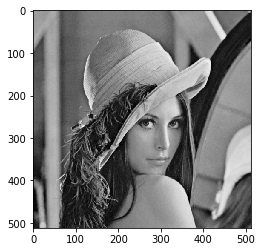

In [9]:
img = cv2.imread('lenna.jpg',0)
plt.imshow(img, cmap='gray')

### Sobel

Usaremos o método [cv.Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d), que já está implementado no OpenCV, para calcular o Sobel em X, o Sobel em Y, e depois vamos realizar a soma para visualizar a imagem resultante.

Dentre os argumentos que o método recebe, o método pede pra especificar o argumento [**ddepth**](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=sobel#cv2.Sobel). Este argumento controla a profundidade da imagem resultante, não em quantidade de canais, mas em tipo de dado. O padrão é definir como **CV_8U**, que é o equivalente a **np.uint8** - uma imagem com 8 bits do tipo *unsigned* (0-255). Usar esse tipo irá acarretar em truncamento da informação dos pixels.

Tipo de dados para:
Sobel (X): uint8	Sobel(Y): uint8


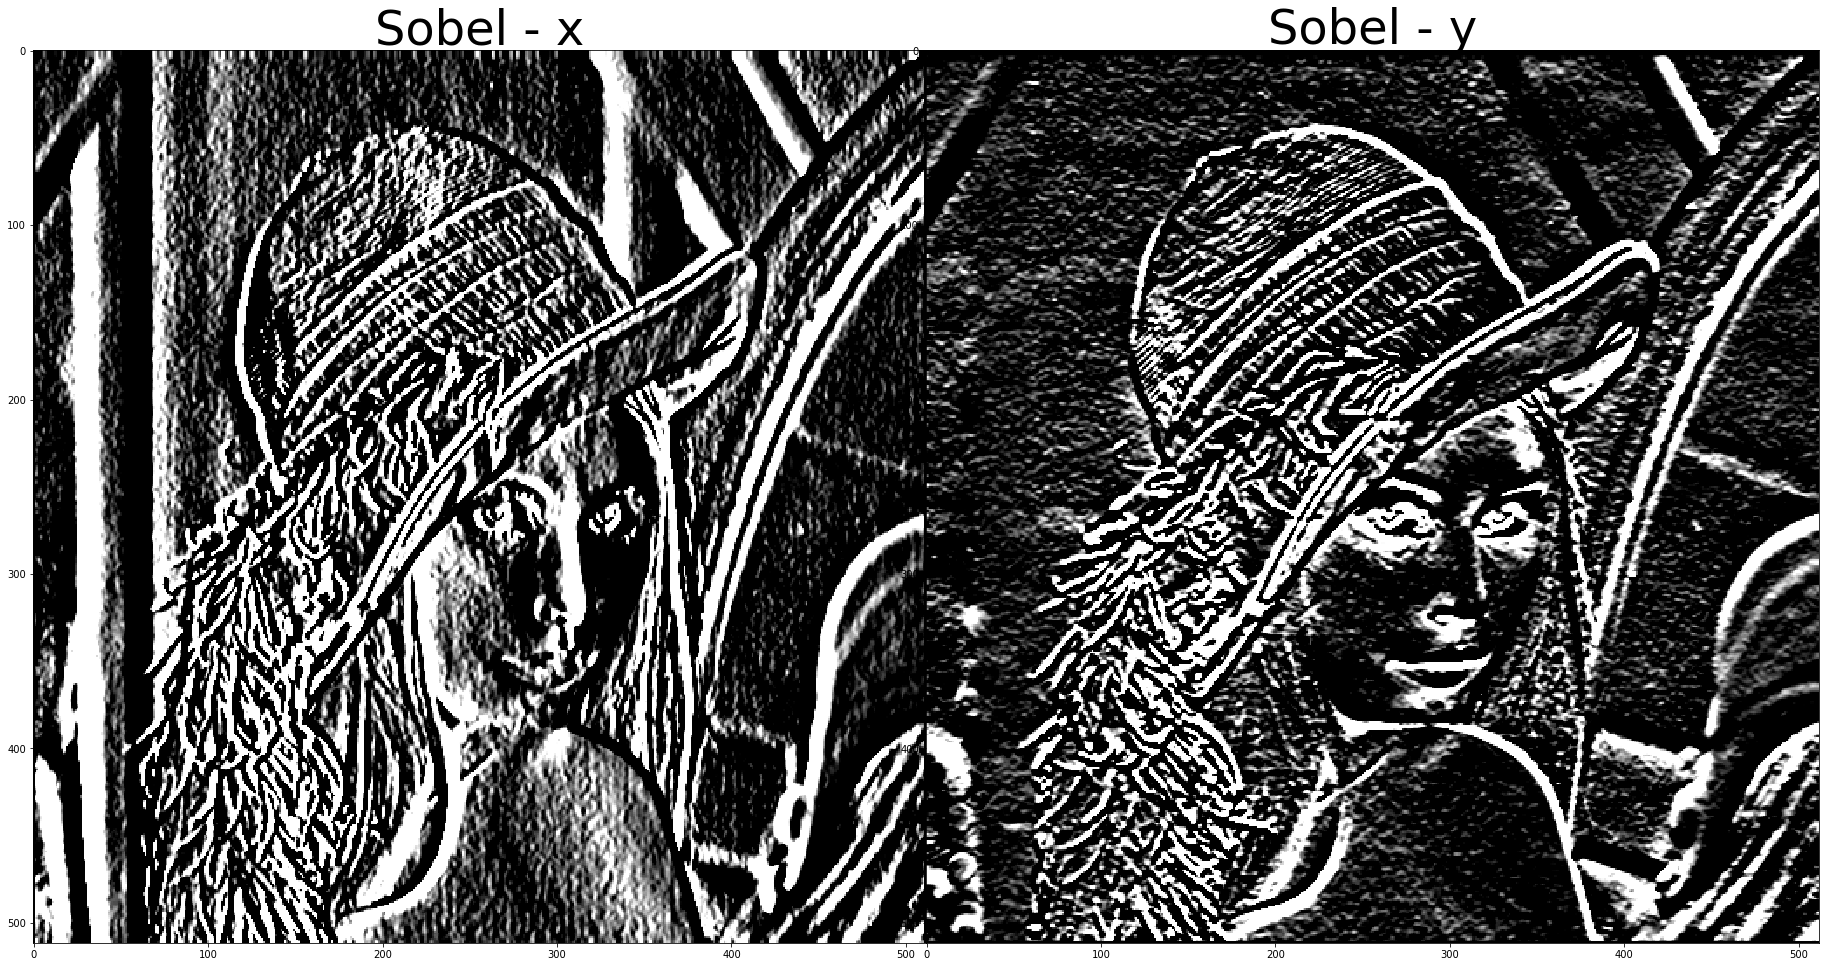

In [17]:
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Sobel - x", fontsize=48)
ax[0].imshow(img_sobelx, cmap='gray')
ax[1].set_title("Sobel - y", fontsize=48)
ax[1].imshow(img_sobely, cmap='gray')

print("Tipo de dados para:\nSobel (X): %s\tSobel(Y): %s" % (img_sobelx.dtype, img_sobely.dtype))

Qual seria o resultado se usarmos o **ddepth** com um valor maior?

Tipo de dados para:
Sobel (X): float64	Sobel(Y): float64


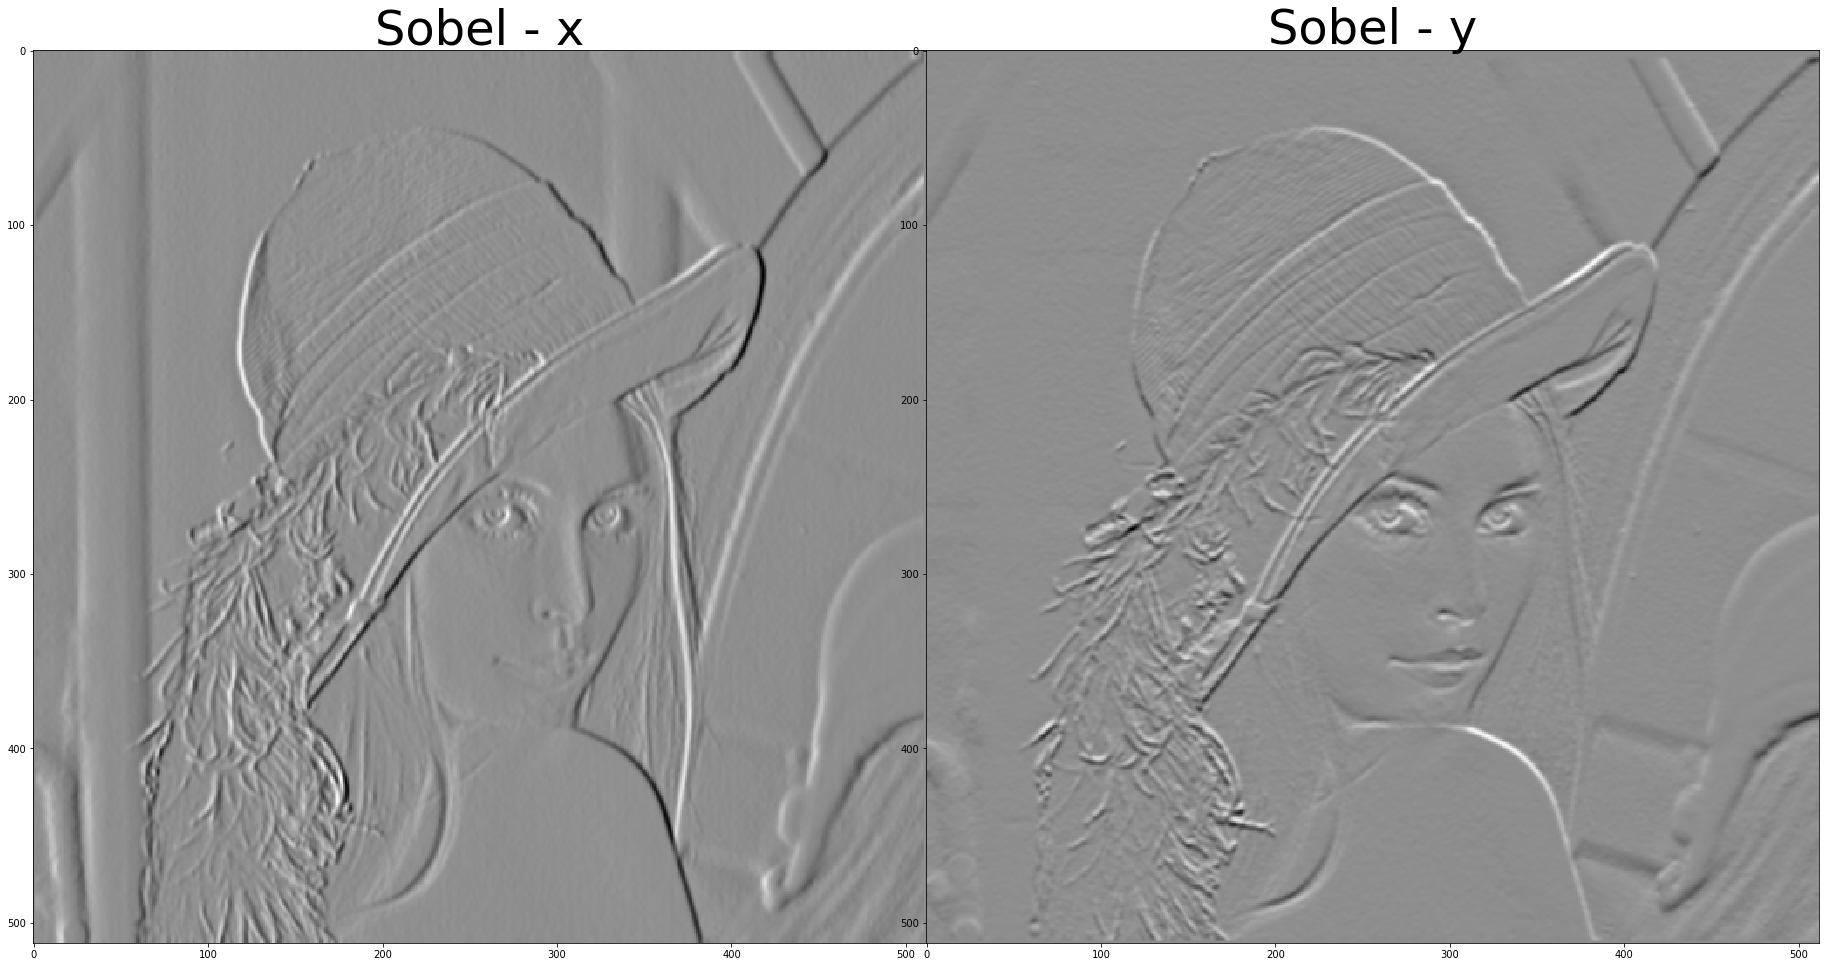

In [18]:
img_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Sobel - x", fontsize=48)
ax[0].imshow(img_sobelx, cmap='gray')
ax[1].set_title("Sobel - y", fontsize=48)
ax[1].imshow(img_sobely, cmap='gray')
print("Tipo de dados para:\nSobel (X): %s\tSobel(Y): %s" % (img_sobelx.dtype, img_sobely.dtype))

Conseguimos ver que os tipos são diferentes. Vamos escolher um elemento aleatório e compará-lo:

In [21]:
print(cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)[0][10], cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)[0][10])

0 -112.0


Podemos ver que o valor em **(0, 10)** da versão da imagem em uint8 é 0, enquanto o valor na versão da imagem em float64 é -112. Essa perda de informação pode ser prejudicial durante o processo, portanto é necessário atentar para o tipo de dado a ser usado.

Vamos somar os gradientes e ver o resultado final:

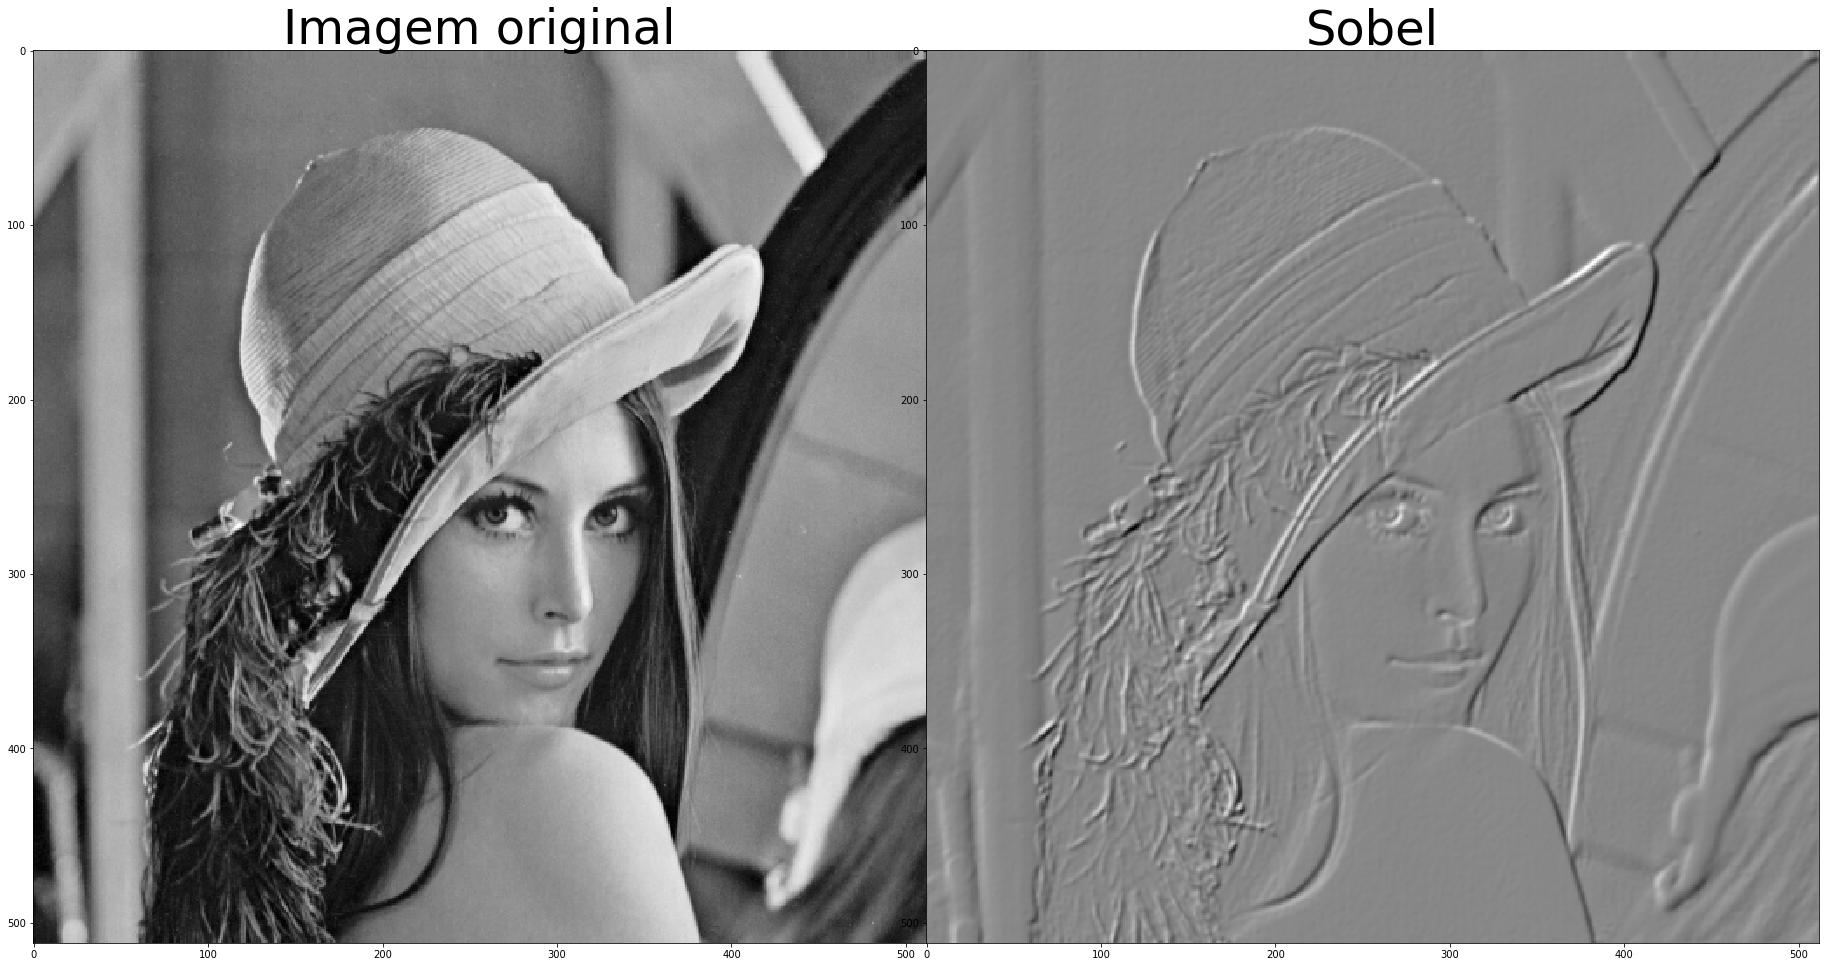

In [24]:
img_sobel = img_sobelx + img_sobely

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Imagem original", fontsize=48)
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Sobel", fontsize=48)
ax[1].imshow(img_sobel, cmap='gray')

Podemos brincar com o argumento **ksize** para obtermos resultados diferentes, e também a possibilidade de aplicar um leve blur na imagem antes:

In [41]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


def f(k, blur):
    
    fig, ax = plt.subplots(1, 2, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    if(k%2==0):
        k+=1 # Não pode ser par dentro do range
    
    if(blur):
        img_b = cv2.GaussianBlur(img,(3,3),0)
        ax[1].set_title("Sobel - (%dx%d) - with blur" % (k, k), fontsize=48)
    else:
        img_b = img
        ax[1].set_title("Sobel - (%dx%d) - no blur" % (k, k), fontsize=48)
    
    img_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=k)
    img_sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=k)
    img_sobel = img_sobelx + img_sobely
    
    
    ax[0].set_title("Imagem original", fontsize=48)
    ax[0].imshow(img, cmap='gray')
    
    ax[1].imshow(img_sobel, cmap='gray')
    
    plt.imshow(img_sobel, cmap="gray")

In [42]:
w = interactive(f, blur=True, k=(1, 7))
display(w)

interactive(children=(IntSlider(value=4, description='k', max=7, min=1), Checkbox(value=True, description='blu…

### Scharr

O Scharr pode ser usado tanto pelo método Scharr() como também como um caso especial do Sobel. Podemos definir o ksize=-1 para aplicar o método. Mais detalhes estão na documentação do método Sobel().

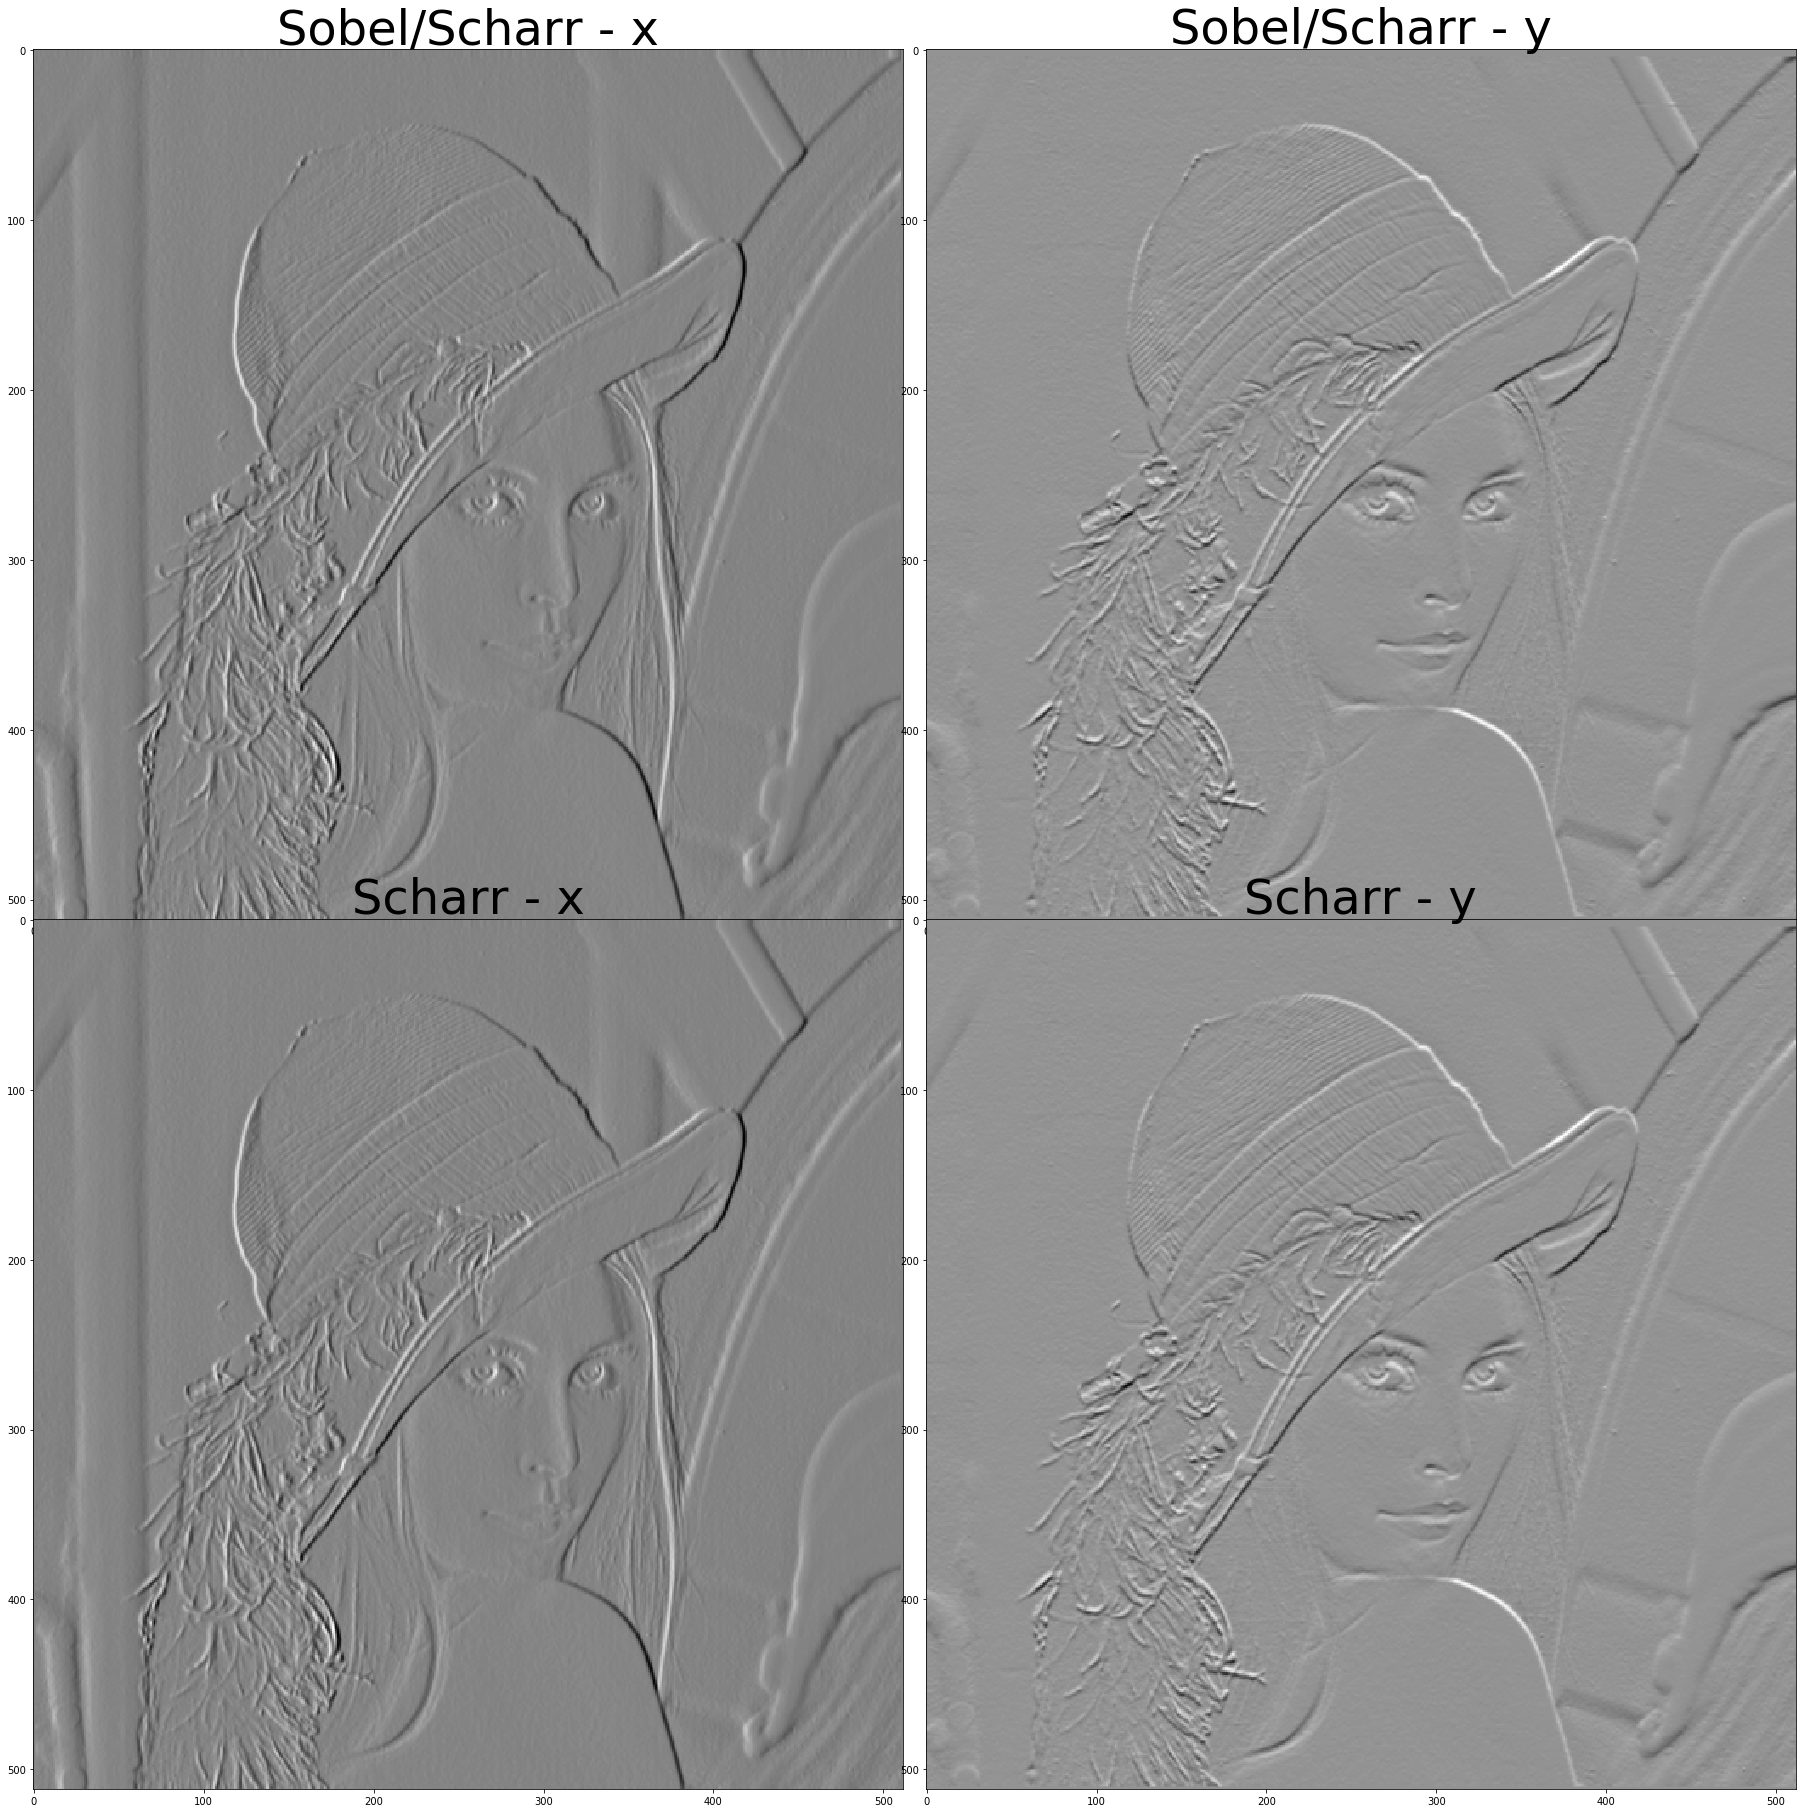

In [49]:
img_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=-1)
img_sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=-1)

img_scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
img_scharry = cv2.Scharr(img,cv2.CV_64F,0,1)

fig, ax = plt.subplots(2, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)

ax[0, 0].set_title("Sobel/Scharr - x", fontsize=48)
ax[0, 0].imshow(img_sobelx, cmap='gray')
ax[0, 1].set_title("Sobel/Scharr - y", fontsize=48)
ax[0, 1].imshow(img_sobely, cmap='gray')

ax[1, 0].set_title("Scharr - x", fontsize=48)
ax[1, 0].imshow(img_scharrx, cmap='gray')
ax[1, 1].set_title("Scharr - y", fontsize=48)
ax[1, 1].imshow(img_scharry, cmap='gray')

Será que as duas imagens são realmente iguais?

In [48]:
(img_sobelx == img_scharrx).all()

True

### Laplaciano

A execução do filtro laplaciano é simples através do método Laplacian(). Vamos ver um exemplo abaixo:

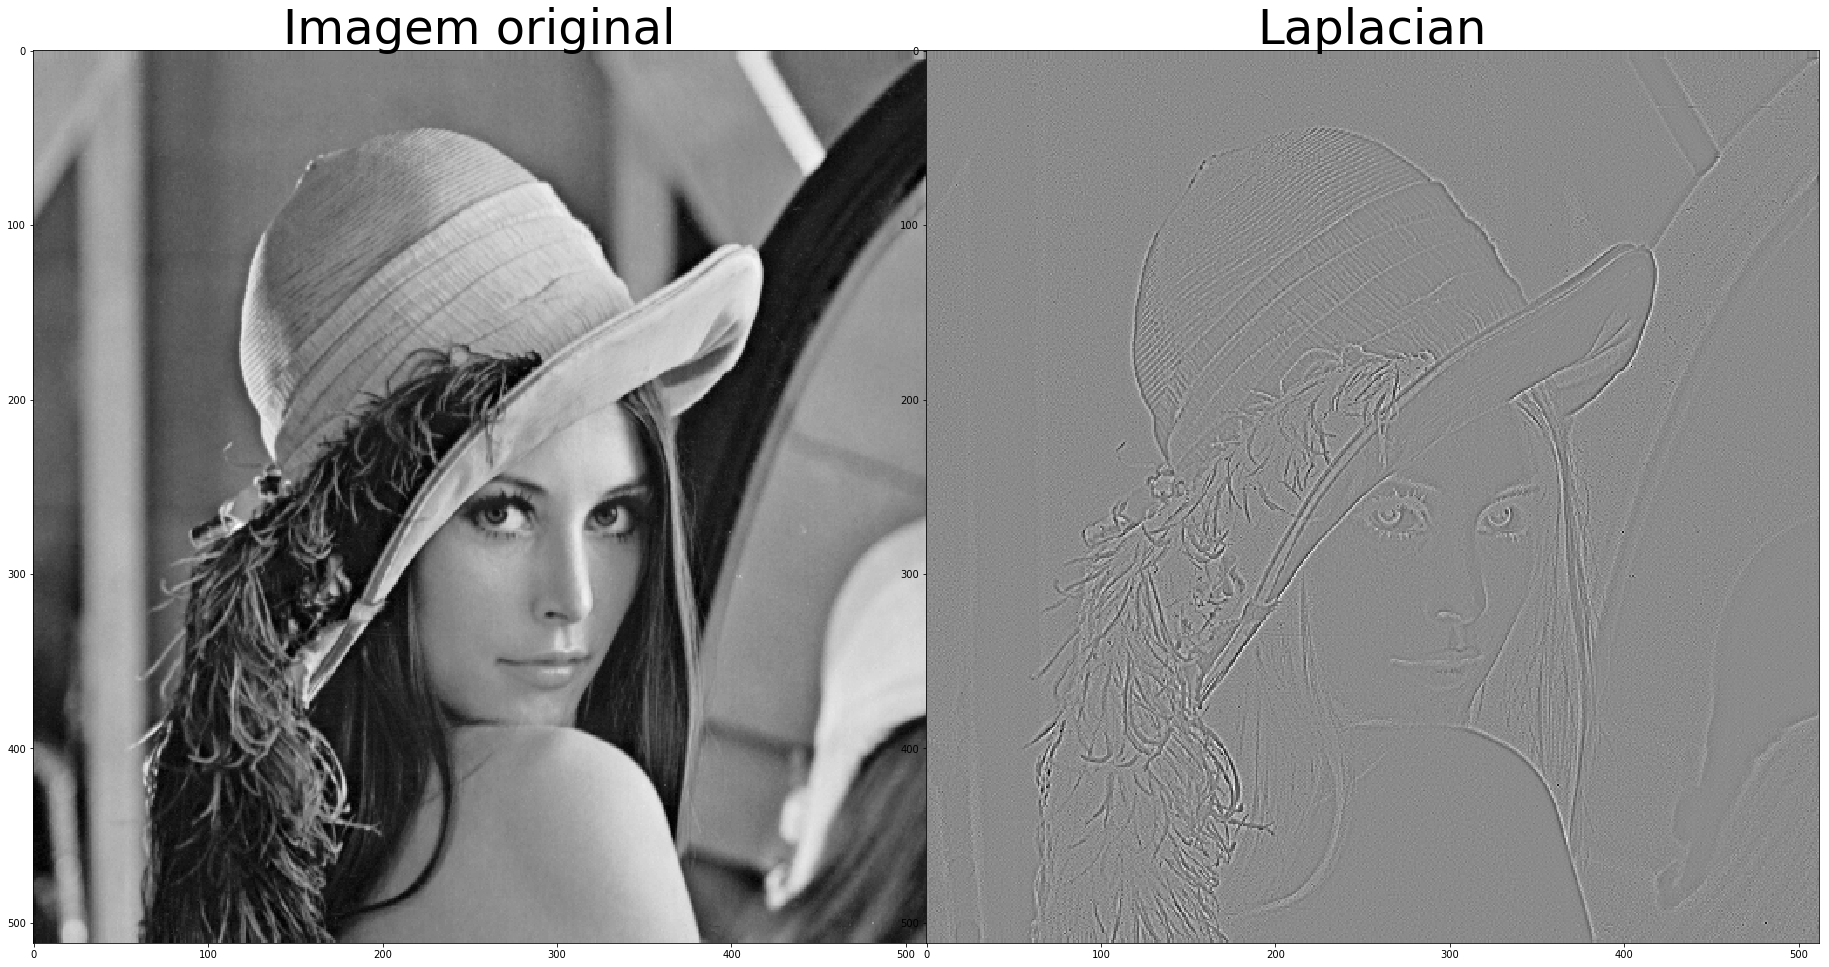

In [59]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Imagem original", fontsize=48)
ax[0].imshow(img, cmap='gray')
ax[1].set_title("Laplacian", fontsize=48)
ax[1].imshow(laplacian, cmap='gray')

O resultado não foi muito satisfatório. Vamos aplicar um borramento na imagem e tentar novamente:

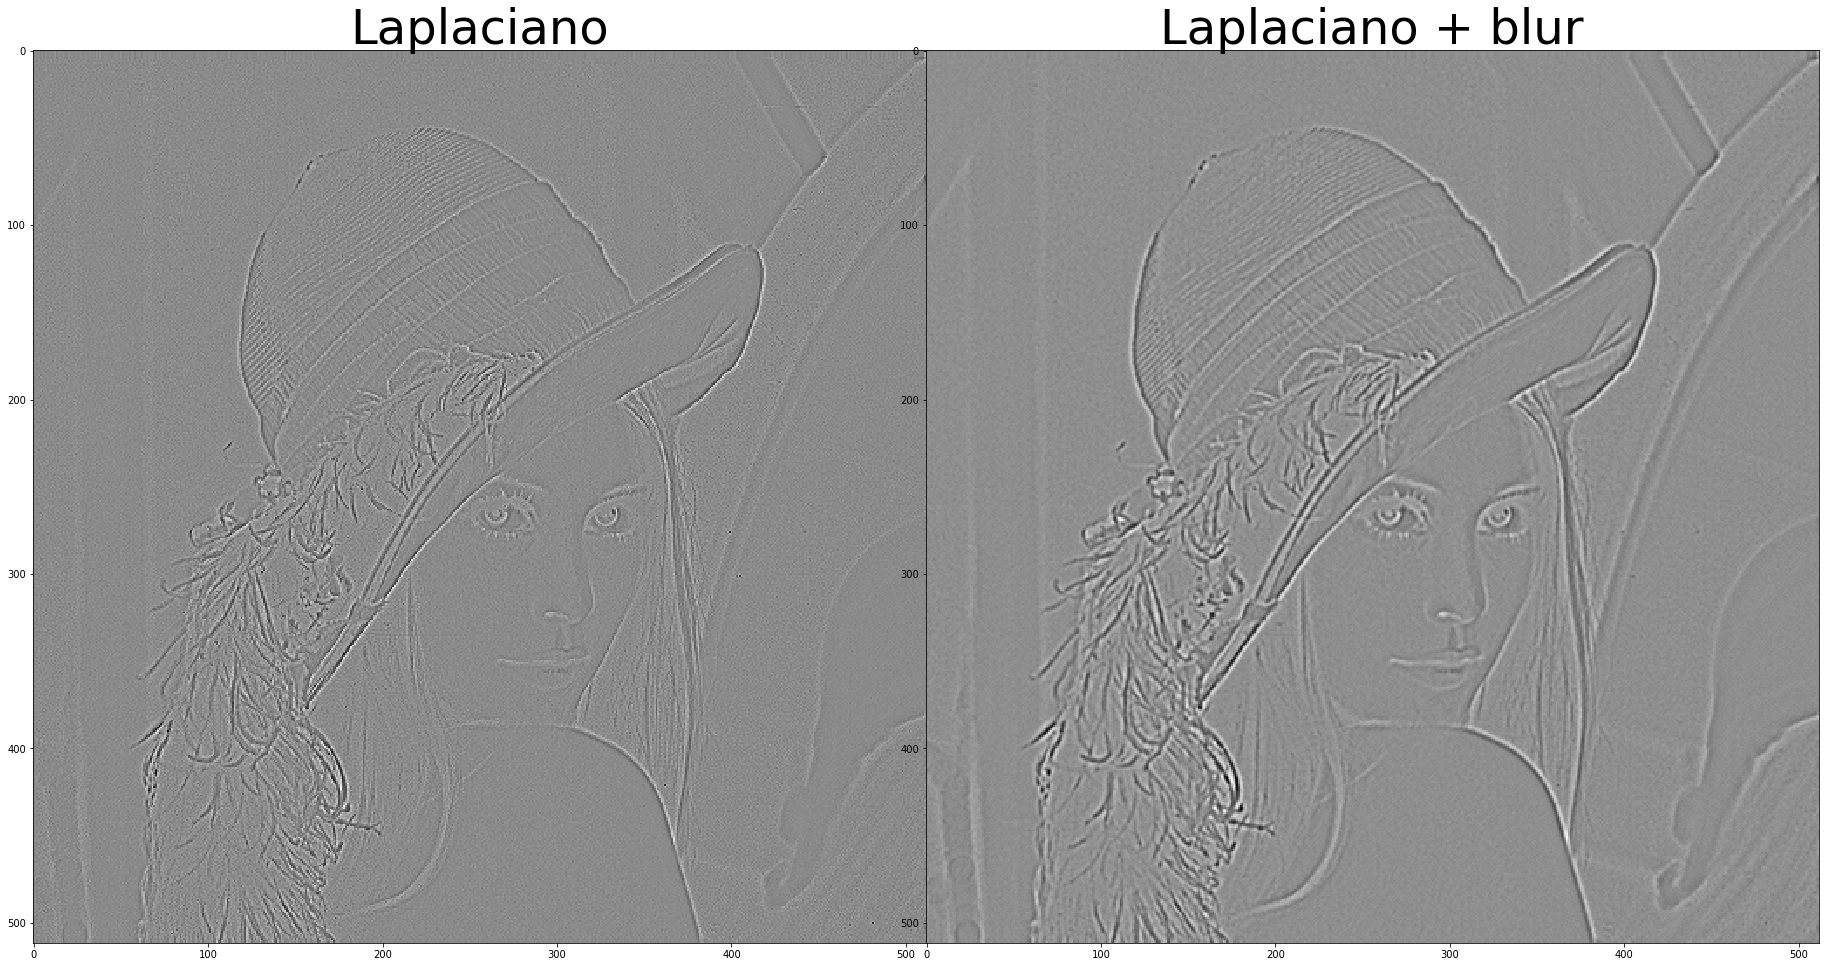

In [58]:
img_b = cv2.GaussianBlur(img, (3, 3), 0)
laplacian_ = cv2.Laplacian(img_b, cv2.CV_64F)

fig, ax = plt.subplots(1, 2, figsize=(32, 32))
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].set_title("Laplaciano", fontsize=48)
ax[0].imshow(laplacian, cmap='gray')
ax[1].set_title("Laplaciano + blur", fontsize=48)
ax[1].imshow(laplacian_, cmap='gray')

### Canny edge

Usaremos o [Canny()](https://docs.opencv.org/3.1.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) para aplicar o Canny edge. Precisaremos definir dois thresholds: o *minVal* e o *maxVal*. Uma recomendação é definir maxVal = minVal\*3. No exemplo abaixo, vamos aplicar o Canny e usar os sliders para definir os thresholds. O botão é responsável por ativar ou desativar a recomendação dada anteriormente:

In [68]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def canny(minVal, maxVal, r):
    
    fig, ax = plt.subplots(1, 2, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    if(r):
        maxVal = minVal*3
    
    canny = cv2.Canny(img,minVal,maxVal)
 
    
    ax[0].set_title("Imagem original", fontsize=48)
    ax[0].imshow(img, cmap='gray')
    ax[1].set_title("Canny - [%d - %d]" % (minVal, maxVal), fontsize=48)
    ax[1].imshow(canny, cmap='gray')

In [69]:
c = interactive(canny, minVal=(0,100), maxVal=(0,300), r=True)
display(c)

interactive(children=(IntSlider(value=50, description='minVal'), IntSlider(value=150, description='maxVal', ma…